In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from scipy import integrate
from pyqcams import pymar, psave, plotters, constants
import json

# Run one trajectory
First, create the QCT calculation input dictionary using the start function, with the input file as the argument.

In [10]:
calc = pymar.start('.') # Create QCT calculation inputs using current directory

## Study Potential Energy Curves

Before we run the trajectory, we should examine the potential functions describing the 3 potential molecules. Since we calculated the energy spectrum of H2, we can also plot the energy level.

In [11]:
# Define system parameters
m1,m2,m3 = calc['m1'], calc['m2'], calc['m3']
mtot = m1 + m2 + m3
mu12 = m1*m2/(m1+m2) # H2
mu31 = m1*m3/(m1+m3) # CaH
mu32 = m2*m3/(m2+m3) # CaH
mu123 = m3*(m1+m2)/mtot

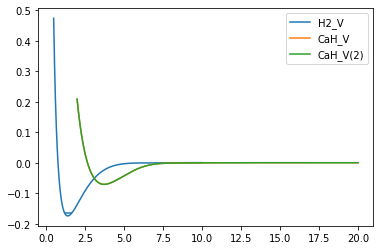

In [12]:
# %matplotlib widget
x1 = np.linspace(.5, 10, 1000) # Span of potential (AB)
x2 = np.linspace(2, 20, 1000)
x3 = np.linspace(2, 20, 1000)

v1 = calc['v1'] # Potential (12)
v2 = calc['v2'] # Potential (23)
v3 = calc['v3'] # Potential (31)

h2 = calc['mol'] # initial molecule object is h2
vi = int(h2.get_nvib()) # initial vibrational number
elev1 = h2.evj # energy spectrum
rm, rp = h2.rm, h2.rp # turning points

plt.figure()
plt.plot(x1, v1(x1), label = 'H2_V')
plt.plot(x2, v2(x2), label = 'CaH_V')
plt.plot(x3, v3(x3), label = 'CaH_V(2)')
plt.hlines(elev1[vi], rm, rp)
plt.legend()
plt.show()

We can run a trajectory and obtain an output by running main(\**calc). Since `plot = True`, we generate trajectory and energy plots over time.

/home/roots/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1105: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/roots/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1106: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


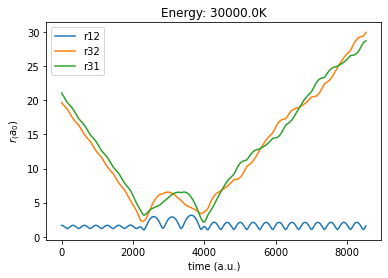

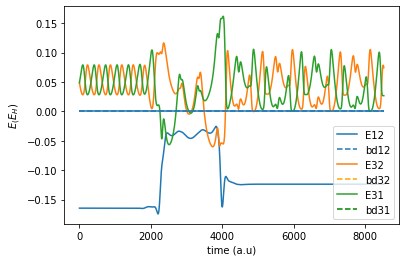

{'e': 30000.0,
 'b': 0,
 'q': 1,
 'r1': 0,
 'r2': 0,
 'diss': 0,
 'comp': 0,
 'v': 2.0,
 'vw': 0.005113390958711382,
 'j': 6.0,
 'jw': 0.0062788998888466665,
 'd_i': 20.37755387680334,
 'theta': 2.5392023161987325,
 'phi': 4.201435533927453,
 'eta': 3.4326402546731507,
 'n_i': 0.0,
 'j_i': 0,
 'rho1x': 0.11879303207194666,
 'rho1y': 0.2118991617355099,
 'rho1z': 1.5502847624479417,
 'rho2x': 0.11879303207194666,
 'rho2y': 0.2118991617355099,
 'rho2z': 1.5502847624479417,
 'p1x': 2.5175197364320074,
 'p1y': 4.490670138627768,
 'p1z': 7.660183678500639,
 'p2x': 4.440825698167973,
 'p2y': 7.921400998379953,
 'p2z': -17.24628423908574,
 'tf': 8524.408905642718}

In [8]:
pymar.main(plot = True,**calc)

To track specific attributes, we can define a QCT object and run a trajectory on it. Following the `main()` function, first create a QCT object, then run the trajectory. 

In [6]:
# Run a trajectory until we get dissociation.
diss = pymar.QCT(**calc)
diss.runT()
i = 0
while diss.count[3] == 0 and i < 15:
    diss.runT()
    print(diss.count)
    i += 1

[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 1, 0]


In [7]:
# Run trajectory until we get a reaction
reac = pymar.QCT(**calc)
reac.runT()
while reac.count[2] == 0 and reac.count[1] == 0:
    reac.runT()
    print(reac.count)

[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
(12) New turning points could not be found. Check if Veff - E < 0 everywhere. Check that your                             "re" guess is less than the minimum of your potential. 
[0, 0, 0, 1, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 1, 0, 0]


In [28]:
quench = pymar.QCT(**calc)
quench.runT()
while quench.count[0] == 0:
    quench.runT()

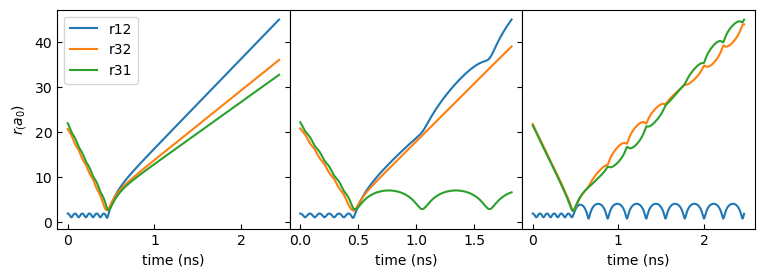

In [42]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize = (9,3))
plotters.traj_plt(diss, axs[0], title=False, legend = True)
plotters.traj_plt(reac, axs[1], title=False, legend = False)
plotters.traj_plt(quench, axs[2], title=False, legend = False)
plt.subplots_adjust(wspace=0, bottom = 0.15)
# axs[0].set_title('Dissociation', x= .5, y = .85)
# axs[1].set_title('Reaction', x= .5, y = .85)
# axs[2].set_title('Quenching', x= .5, y = .85)
axs[1].set_xlabel('time (ns)')
axs[2].set_xlabel('time (ns)')
axs[0].set_xlabel('time (ns)')
axs[0].set_ylabel('$r_(a_0)$')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[0].tick_params(axis = 'x', direction = 'in')
axs[1].tick_params(axis = 'x', direction = 'in')
axs[2].tick_params(axis = 'x', direction = 'in')
axs[0].tick_params(axis = 'y', direction = 'in')
# plt.show()
# plt.tight_layout(w_pad=-.3)
# fig.supxlabel('time (a.u.)', fontsize = 12)
# fig.supylabel('$r_(a_0)$', fontsize = 12, ha = 'left')
# plt.savefig(r'C:\Users\Rian\Documents\research\jesusgroup\DAMOP23\traj3.svg')

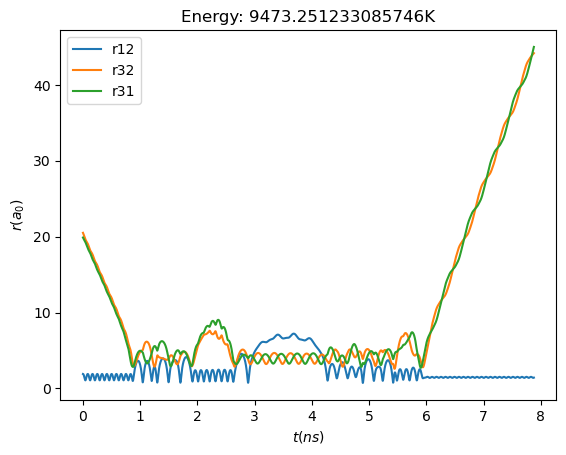

In [39]:
# Complex formation
calc['e0'] = 0.03
comp = pymar.QCT(**calc)
comp.runT()
while comp.count[0] == 0:
    comp.runT()

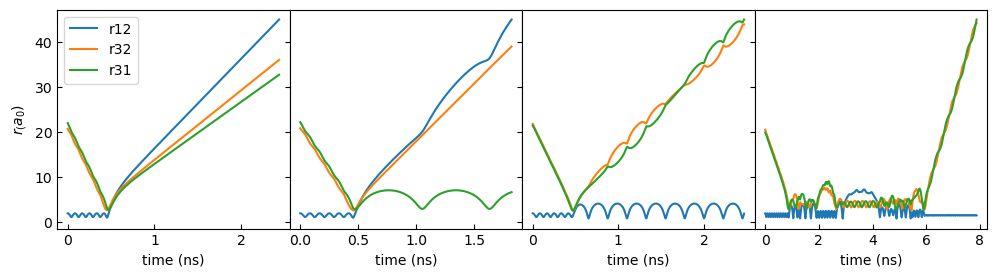

In [53]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize = (12,3))
plotters.traj_plt(diss, axs[0], title=False, legend = True)
plotters.traj_plt(reac, axs[1], title=False, legend = False)
plotters.traj_plt(quench, axs[2], title=False, legend = False)
plotters.traj_plt(comp, axs[3], title=False, legend = False)
plt.subplots_adjust(wspace=0, bottom = 0.15)
# axs[0].set_title('Dissociation', x= .5, y = .85)
# axs[1].set_title('Reaction', x= .5, y = .85)
# axs[2].set_title('Quenching', x= .5, y = .85)
axs[1].set_xlabel('time (ns)')
axs[2].set_xlabel('time (ns)')
axs[0].set_xlabel('time (ns)')
axs[3].set_xlabel('time (ns)')
axs[0].set_ylabel('$r_(a_0)$')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')
axs[0].tick_params(axis = 'x', direction = 'in')
axs[1].tick_params(axis = 'x', direction = 'in')
axs[2].tick_params(axis = 'x', direction = 'in')
axs[3].tick_params(axis = 'x', direction = 'in')
axs[0].tick_params(axis = 'y', direction = 'in')
# plt.show()
# plt.tight_layout(w_pad=-.3)
# fig.supxlabel('time (a.u.)', fontsize = 12)
# fig.supylabel('$r_(a_0)$', fontsize = 12, ha = 'left')
# plt.savefig(r'C:\Users\Rian\Documents\research\jesusgroup\DAMOP23\traj4.svg')

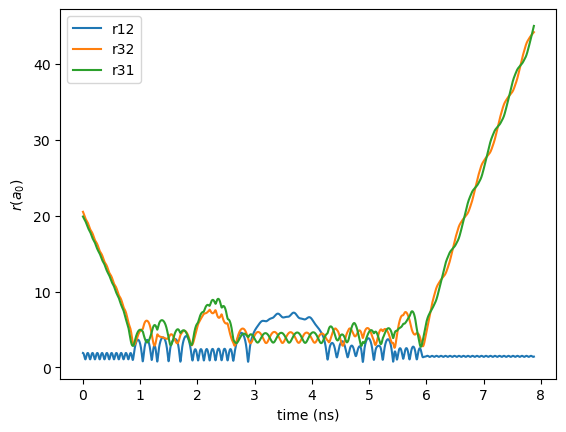

In [55]:
fig, ax = plt.subplots()
plotters.traj_plt(comp, ax, title = False)
ax.set_xlabel('time (ns)')
plt.savefig(r'C:\Users\Rian\Documents\research\jesusgroup\DAMOP23\complex.svg')

Trace the path through time.

In [11]:
ax1 = plotters.traj_3d(reac)
plt.show(ax1)

NameError: name 'reac' is not defined

# Parallel Run
For the same (Ec,b), run 'n_traj' number of trajectories, and save to 'results_short.csv' file. Use the `save_short` method from the `psave.py` file. This can be done directly as shown in the `sim.py` file. 

In [6]:
n_traj = 2
out_file = f'test_short.csv'
cpus = os.cpu_count() # Number of cpus for parallel calculation
bvals = np.arange(0,1,.25) # Range of impact parameters

calc = pymar.start('.') # Calculated parameters for main function

# loop over all impact parameters
t1 = time.time()

for b in bvals:
    calc['b'] = b # set new impact parameter
    # psave.save_long(n_traj, cpus, calc, f'{out_file}') # Uncomment for long output
    psave.save_short(n_traj, cpus, calc, f'{out_file}') # Uncomment for short output
print(f'{n_traj*len(bvals)} trajectories done in {time.time()-t1} s.')

8 trajectories done in 15.2006676197052 s.


## Analyzing the data
Use pandas DataFrames to find the cross section or rates of the reaction CaH. We use a large dataset located on the author's local machine to see meaningful results.

In [19]:
# Define system parameters
with open('inputs.json','r') as f:
    data = json.load(f)
m1,m2,m3 = data['masses'].values()
mtot = m1 + m2 + m3
mu12 = m1*m2/(m1+m2) # H2
mu31 = m1*m3/(m1+m3) # CaH
mu32 = m2*m3/(m2+m3) # CaH
mu123 = m3*(m1+m2)/mtot

In [19]:
df = pd.read_csv('cah_data/fv0j0.csv') # 10000 trajectories per impact parameter
df = df[df['v'] >= 0]
stats = df.iloc[:,:7].groupby(['e','b']).sum()
weights = df.drop(df.iloc[:,9:], axis=1)
nt = stats.sum(axis=1) # Total number of trajectories for a given (E,b)

In [20]:
# Define weights 
is_cah1 = df['r1'] == 1 
is_cah2 = df['r2'] == 1
is_cah = is_cah1 | is_cah2
cah_w = weights[is_cah].groupby(['e','b','v']).sum()
h2_w = weights[weights['h2']==1].groupby(['e','b','v']).sum()
d_w = weights[weights['d'] == 1].groupby(['e','b','v']).sum()
# Net weight should be summed over all v' values, 
# with the number of dissociation results added.
net_w = weights.groupby(['e','b']).sum()
net_w['w'] += net_w['d']

<IPython.core.display.Javascript object>


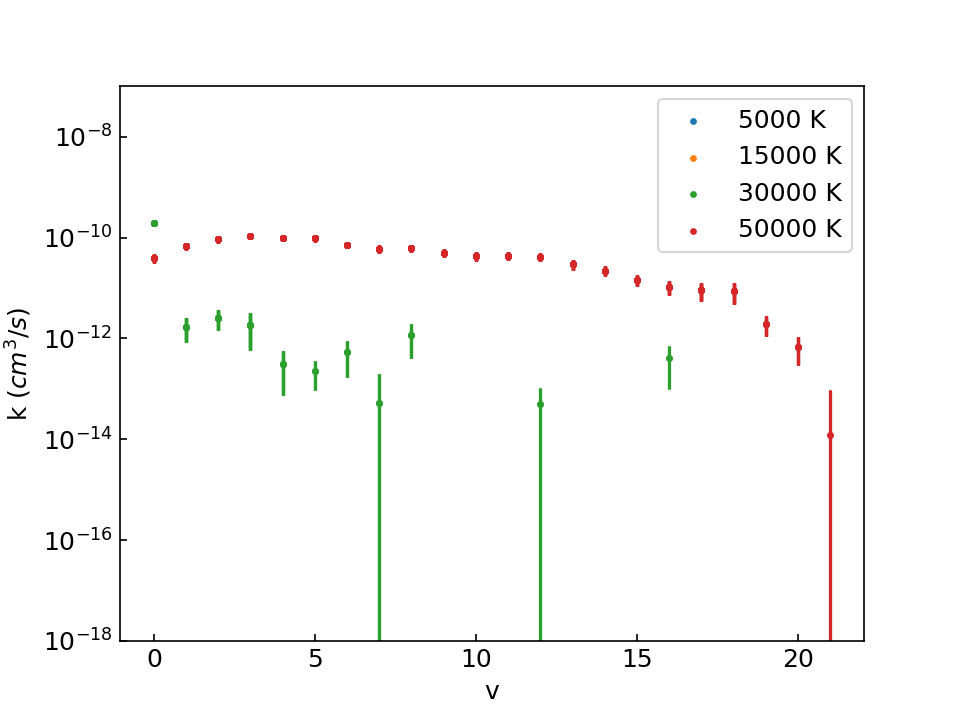

Text(0, 0.5, 'k $(cm^3/s)$')

In [27]:
# DISTRIBUTIONS
cah = df[is_cah].groupby(['e','b','v']).sum()
cah['p_r'] = cah_w['w']/net_w['w'] # Probability of reaction P(E,b,v)
cah['perr_r'] = np.sqrt(cah_w['w'])/net_w['w']*np.sqrt((net_w['w']-cah_w['w'])/net_w['w'])
### Calculate cross section & rates ### 
cah = cah.reset_index() # Drop dependence on b to integrate
cah.set_index(['e','v'], inplace=True)
cah['s'] = cah.groupby(['e','v']).apply(lambda g: 8*np.pi**2*integrate.trapz(g.p_r*g.b, x=g.b))
cah['s_err'] = cah.groupby(['e','v']).apply(lambda g: 8*np.pi**2*integrate.trapz(g.perr_r*g.b, x=g.b))
cah['k'] = np.sqrt(2*3/2*constants.kb*cah['s'].index.get_level_values(level = 'e')/mu123)*cah['s']*constants.autocm**3/constants.ttos
cah['k_err'] = np.sqrt(2*3/2*constants.kb*cah['s_err'].index.get_level_values(level = 'e')/mu123)*cah['s_err']*constants.autocm**3/constants.ttos

### Plot rate ###
cah = cah.reset_index()
evals = cah.e.unique()
evals = [5000,15000,30000, 50000]
plt.rcParams.update({'font.size':12})
plt.rc('axes', labelsize = 12)
ax = cah[cah['e']==evals[0]].plot.scatter(x='v',y='k', yerr = 'k_err', marker ='.', label = f'{evals[0]} K')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for idx,e in enumerate(evals[1:]): 
    idx += 1
    cah[cah['e']==e].plot.scatter(x='v',y='k', yerr = 'k_err', marker ='.', label = f'{e} K', c = colors[idx], ax=ax)
ax.tick_params(axis = 'x', direction = 'in')
ax.tick_params(axis = 'y', direction = 'in')
# plt.legend(bbox_to_anchor = (1,1))
plt.yscale('log')
plt.ylim(10e-19,10e-8)
plt.ylabel('k $(cm^3/s)$')
# plt.title('CaH Formation Rate Distribution ($v_i = 1$)')
# plt.savefig('results/comm_figs/cah_dist_over.svg')


## Inspect the effect of $v_i$ on CaH formation

In [20]:
df0 = pd.read_csv('cah_data/fv0j0.csv')
df1 = pd.read_csv('cah_data/fv1j0.csv')
df2 = pd.read_csv('cah_data/fv2j0.csv')

In [26]:
df = pd.concat([df0,df1,df2])
df = df[df['v'] >= 0]
df = df.set_index('n_i')
stats = df.groupby(['e','b']).sum().loc[:,:'diss']
weights = df.drop(df.loc[:,'d_i':], axis=1)
nt = stats.sum(axis=1) # Total number of trajectories for a given (E,b)

In [29]:
# Define weights 
is_cah1 = df['cah1'] == 1 
is_cah2 = df['cah2'] == 1
is_cah = is_cah1 | is_cah2 # Combine reaction 1 and reaction 2
cah_w = weights[is_cah].groupby(['n_i','e','b','v']).sum()
h2_w = weights[weights['h2']==1].groupby(['n_i','e','b','v']).sum()
d_w = weights[weights['diss'] == 1].groupby(['n_i','e','b','v']).sum()
# Net weight should be summed over all v' values, 
# with the number of dissociation results added.
net_w = weights.groupby(['n_i','e','b']).sum()
net_w['w'] += net_w['diss']

In [31]:
# DISTRIBUTIONS
cah = df[is_cah].groupby(['n_i','e','b','v']).sum()
cah['p'] = cah_w['w']/net_w['w'] # Probability of reaction P(E,b,v)
cah['p_err'] = np.sqrt(cah_w['w'])/net_w['w']*np.sqrt((net_w['w']-cah_w['w'])/net_w['w'])
### Calculate cross section & rates ### 
cah = cah.reset_index(level = 2) # Drop dependence on b to integrate
# cah.set_index(['n_i','e','v'], inplace=True)
cah['s'] = cah.groupby(['n_i','e','v']).apply(lambda g: 8*np.pi**2*integrate.trapz(g.p*g.b, x=g.b))
cah['s_err'] = cah.groupby(['n_i','e','v']).apply(lambda g: 8*np.pi**2*integrate.trapz(g.p_err*g.b, x=g.b))
cah['k'] = np.sqrt(2*3/2*constants.kb*cah['s'].index.get_level_values(level = 'e')/mu123)*cah['s']*constants.autocm**3/constants.ttos
cah['k_err'] = np.sqrt(2*3/2*constants.kb*cah['s_err'].index.get_level_values(level = 'e')/mu123)*cah['s_err']*constants.autocm**3/constants.ttos

In [ ]:
### Plot rate ###
cah = cah.reset_index() 
# cah = cah[cah['b'] == .75]
evals = cah.e.unique()
# evals = [40000]
evals = [5000, 20000, 30000, 40000, 50000]
plt.rcParams.update({'font.size':12})
plt.rc('axes', labelsize = 12)
wich = f'k'
ax = cah[cah['e']==evals[0]].plot.scatter(x='v',y=f'{wich}', yerr = f'{wich}_err', marker ='.', label = f'{evals[0]} K')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for idx,e in enumerate(evals[1:]): 
    idx += 1
    cah[cah['e']==e].plot.scatter(x='v',y=f'{wich}', yerr = f'{wich}_err', marker ='.', label = f'{e} K', c = colors[idx], ax=ax)
# ax.set_yscale('log')
ax.tick_params(axis = 'x', direction = 'in')
ax.tick_params(axis = 'y', direction = 'in', which = 'both')
plt.xticks(np.arange(0,int(max(cah.v.unique()))+2, 2))
# plt.legend(bbox_to_anchor = (1,1))
# plt.ylim(10e-19,10e-8)
plt.ylabel(f'${wich}_r (cm^3/s)$')
plt.title('CaH Formation Rate Distribution ($v_i = 0$)')

<IPython.core.display.Javascript object>


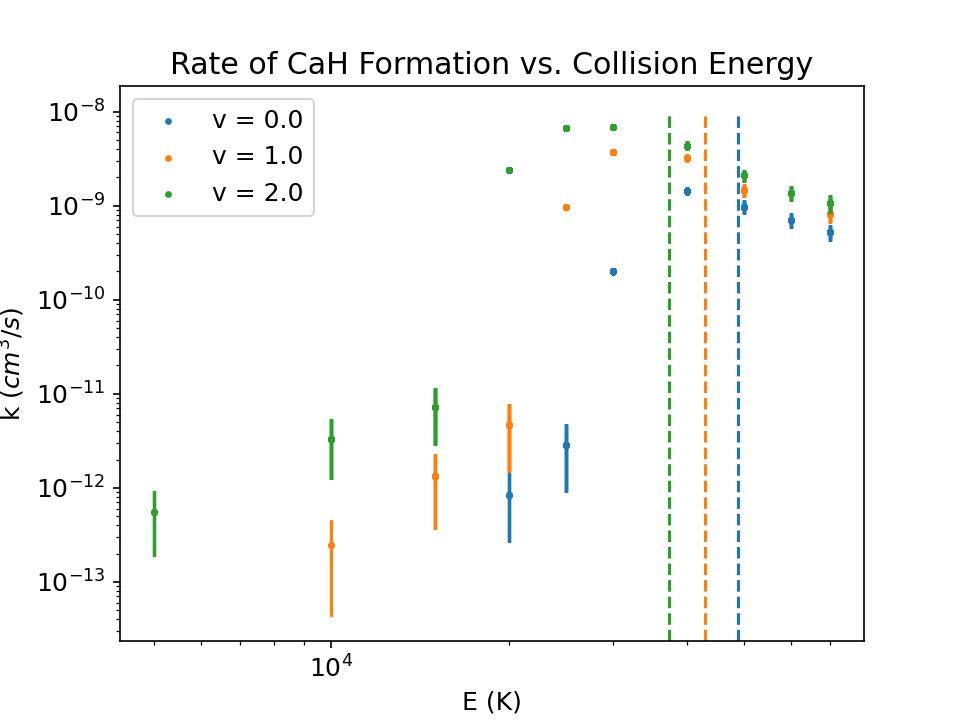

Text(0, 0.5, 'k ($cm^3/s$)')

In [33]:
# Calculate P(E,b), sigma(E), k(E) #
# Sum over v's
cah_eb = cah.reset_index().groupby(['n_i','e','b']).sum()
cah_eb = cah_eb.reset_index(level = 2) # Drop dependence on b to integrate
cah_eb['s(e)'] = cah_eb.groupby(['n_i','e']).apply(lambda g: 8*np.pi**2*integrate.trapz(g.p_r*g.b, x=g.b))
cah_eb['s_err(e)'] = cah_eb.groupby(['n_i','e']).apply(lambda g: 8*np.pi**2*integrate.trapz(g.perr_r*g.b, x=g.b))
cah_eb['k(e)'] = np.sqrt(2*3/2*constants.kb*cah_eb['s(e)'].index.get_level_values(level = 'e')/mu123)*cah_eb['s(e)']*constants.autocm**3/constants.ttos
cah_eb['k_err(e)'] = np.sqrt(2*3/2*constants.kb*cah_eb['s_err(e)'].index.get_level_values(level = 'e')/mu123)*cah_eb['s_err(e)']*constants.autocm**3/constants.ttos
cah_eb['s(e)'] = cah_eb['s(e)'].drop_duplicates()
cah_eb = cah_eb.reset_index()
elev = cah_eb.n_i.unique()
di = [0.15468234,0.13583315,0.11820821, 0.10180754, 0.08663113]
ax = cah_eb[cah_eb['n_i']==0].plot.scatter(x='e',y='k(e)', yerr= 'k_err(e)', marker = '.', label = f'v = {elev[0]}')
plt.vlines(di[0]/constants.cEK2H, 0, 1e-8, linestyles='dashed')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx,v in enumerate(elev[1:]):
    idx += 1
    cah_eb[cah_eb['n_i']==v].plot.scatter(x = 'e', y = 'k(e)', yerr = 'k_err(e)', marker = '.', label = f'v = {v}', color = colors[idx], ax=ax)
    plt.vlines(di[idx]/constants.cEK2H, 0, 1e-8, linestyles='dashed', color = colors[idx])
plt.xscale('log')
plt.yscale('log')
plt.title('Rate of CaH Formation vs. Collision Energy')
plt.xlabel('E (K)')
plt.ylabel('k ($cm^3/s$)')